<a href="https://colab.research.google.com/github/nathan-tw/Data-Science-for-Cybersecurity/blob/master/HW05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
class Hooklog(object):
  filepathname = None
  par = None
  
  digitname = None
  length = None
  li = None

  def __init__(self, filepathname, par = False):
    self.filepathname = filepathname
    self.par = par
    self.li = list()
    self.length = 0
    
    assert filepathname != ""
    self._parseDigitName()
    self._parseHooklog()
  
  def __len__(self):
    return self.length
  
  def __iter__(self):
    return iter(self.li)
  
  def __str__(self):
    return "class Hooklog: %s, par = %s, len = %d, digit name = %s" % (self.filepathname, self.par, self.length, self.digitname)
  
  def _parseDigitName(self):
    self.digitname = self.filepathname.split('/')[-1][0:6] + '-' + self.filepathname.split('_')[-1].split('.')[0]
    
  def _parseHooklog(self):
    if os.path.isfile(self.filepathname):
      handle = open(self.filepathname, "rb")
      
      while True:
        tick, api, pars = self._getNextPair(handle)
        if tick == 0:
          break
        if self.par:
          self.li.append((tick, api, pars))
        else:
          self.li.append((tick, api))
        self.length += 1
      if handle:
        handle.close()
        
      self.li.sort(key = lambda tup: tup[0]) # sort by tick
      
    else:
      print("file not exist!")
      raise
      
  def _getNextPair(self, handle):
    tick = 0
    api = ''
    pars = None
    
    while True:
      line = handle.readline().decode("windows-1252")
      if not line:
        break # eof
      if line[0] == '#': # a new call
        tick = line[1:].strip()
        api = handle.readline().decode("windows-1252").strip() # next line
        api = api[1:] if api[0] == '=' else api # remove '='
        
        if self.par == True:
          pars = self._getParValue(api, handle)
        break
      else:
        continue
    return tick, api, pars
  
  def _getParValue(self, api, handle):
    firstpar = handle.readline().decode("windows-1252").strip()
    return firstpar
  
  def getAPISet(self, gram = 1):
    _set = set()
    for i in range(self.length - gram + 1):
      key = ''
      for g in range(gram):
        key += self.li[i+g][1] # api
      _set.add(key)
    return _set

In [0]:
# download hooklog
!wget https://drive.google.com/uc?id=1N7soVI07VrL7j-ZDZ0X6Q25XOQptamu8 -O hooklogs.zip

--2020-04-19 07:44:40--  https://drive.google.com/uc?id=1N7soVI07VrL7j-ZDZ0X6Q25XOQptamu8
Resolving drive.google.com (drive.google.com)... 173.194.214.100, 173.194.214.113, 173.194.214.102, ...
Connecting to drive.google.com (drive.google.com)|173.194.214.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pdgn0ba2ig41ron9s785vkoog6k6rg9l/1587282225000/17174434063503717705/*/1N7soVI07VrL7j-ZDZ0X6Q25XOQptamu8 [following]
--2020-04-19 07:44:51--  https://doc-0o-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pdgn0ba2ig41ron9s785vkoog6k6rg9l/1587282225000/17174434063503717705/*/1N7soVI07VrL7j-ZDZ0X6Q25XOQptamu8
Resolving doc-0o-38-docs.googleusercontent.com (doc-0o-38-docs.googleusercontent.com)... 173.194.216.132, 2607:f8b0:400c:c12::84
Connecting to doc-0o-38-docs.googleusercontent.com (doc-0o-38-docs.googleusercontent.com)|1

In [0]:
!unzip hooklogs.zip

Archive:  hooklogs.zip
   creating: hooklogs419/
  inflating: hooklogs419/0006dfb19193ff5910b3ffc94a29a7f6_1416.trace.hooklog  
  inflating: hooklogs419/0278192ce1aa7f8c4ae746eae73e6475_1484.trace.hooklog  
  inflating: hooklogs419/02c27a2e4c215d22fabdfc7b46fd6f20_1536.trace.hooklog  
  inflating: hooklogs419/02fbfeafd096088a56f6ffb9_1380.trace.hooklog  
  inflating: hooklogs419/03ae42959b733f11a168e268_1264.trace.hooklog  
  inflating: hooklogs419/03ae42959b733f11a168e268_1332.trace.hooklog  
  inflating: hooklogs419/03c009b451e012002513513a5d7e1b00_1280.trace.hooklog  
  inflating: hooklogs419/03c009b451e012002513513a5d7e1b00_604.trace.hooklog  
  inflating: hooklogs419/043121379d4a5f0f227d74ef0336428c_1636.trace.hooklog  
  inflating: hooklogs419/060c18ffe4b4f8b47c90a2339533d622_1568.trace.hooklog  
  inflating: hooklogs419/0776c66dfed69d4ea0b60d1c_1504.trace.hooklog  
  inflating: hooklogs419/08261732bfcae9a06c7fd6e6f76b2a81_1100.trace.hooklog  
  inflating: hooklogs419/08261732bfc

In [0]:
# directory walk

import os

hl_list = []
sn_list = [] # short name

for dirPath, dirNames, fileNames in os.walk("/content/hooklogs419/"):
  for fileName in fileNames:
    filenamepath = os.path.join(dirPath, fileName)
    try:
      hl = Hooklog(filenamepath)
      hl_list.append(hl)
      sn_list.append(hl.digitname)
    except:
      print("Error:", filenamepath)

In [0]:
!ls -a

.  ..  .config	hooklogs419  hooklogs.zip  sample_data


In [0]:
APISet = set()
for hl in hl_list:
  APISet = APISet.union(hl.getAPISet(gram = 2))
APISet_li = list(APISet)

In [0]:
len(APISet)

94

In [0]:
APIDict = {i:api for i,api in list(enumerate(APISet_li))}
APIDict.update( {api:i for i,api in list(enumerate(APISet_li))} )

In [0]:
#two-gram one hot encoding
onehot_hl_li = []
for hl in hl_list:
  onehot_api_li = [0]*94
  for i in range(len(hl)-1):
      key = ''
      for g in range(2):
        key += hl.li[i+g][1] # api
      onehot_api_li[APIDict[key]] = 1
  onehot_hl_li.append(onehot_api_li)
print(len(onehot_hl_li))  

419


In [0]:
import pandas as pd
import numpy as np

df = pd.DataFrame(onehot_hl_li, columns=APISet_li, index=sn_list)
df.head()

,RegDeleteKeyRegQueryValue,CreateProcessCreateProcessInternal,CreateProcessInternalRegQueryValue,RegQueryValueRegCreateKey,DeleteFileRegQueryValue,RegCreateKeyRegCreateKey,CopyFileCopyFile,CreateFileCreateProcessInternal,DeleteFileCreateProcessInternal,CreateFileRegQueryValue,RegQueryValueExitProcess,OpenProcessCreateFile,RegSetValueRegQueryValue,RegDeleteKeyRegSetValue,DeleteFileCreateFile,RegCreateKeyCreateFile,DeleteFileRegCreateKey,CreateFileDeleteFile,RegSetValueDeleteFile,CreateFileRegSetValue,RegQueryValueCopyFile,CreateProcessRegQueryValue,RegEnumValueRegEnumValue,RegSetValueCreateFile,OpenProcessRegCreateKey,RegQueryValueCreateProcessInternal,RegCreateKeyRegSetValue,LoadLibraryRegEnumValue,CreateProcessCreateFile,RegEnumValueLoadLibrary,RegDeleteKeyRegDeleteKey,DeleteFileLoadLibrary,RegQueryValueDeleteFile,CopyFileRegQueryValue,RegSetValueRegSetValue,RegCreateKeyRegDeleteKey,RegQueryValueRegQueryValue,CreateFileExitProcess,OpenProcessExitProcess,CopyFileCreateFile,...,LoadLibraryExitProcess,RegCreateKeyCreateProcessInternal,CreateProcessInternalCreateFile,RegQueryValueRegSetValue,RegEnumValueRegQueryValue,DeleteFileDeleteFile,CreateFileRegCreateKey,CreateProcessInternalLoadLibrary,CreateFileLoadLibrary,CreateFileOpenProcess,CreateFileCopyFile,RegQueryValueLoadLibrary,RegEnumValueCreateFile,RegDeleteKeyRegCreateKey,DeleteFileExitProcess,ExitProcessDeleteFile,RegEnumValueRegCreateKey,CreateProcessInternalCreateProcess,CreateFileRegEnumValue,DeleteFileOpenProcess,LoadLibraryCreateProcessInternal,CopyFileRegCreateKey,RegSetValueRegCreateKey,OpenProcessRegDeleteKey,OpenProcessRegQueryValue,LoadLibraryRegQueryValue,RegQueryValueCreateFile,LoadLibraryRegDeleteKey,CreateProcessLoadLibrary,RegCreateKeyRegQueryValue,CreateFileCreateFile,CopyFileRegSetValue,LoadLibraryDeleteFile,RegSetValueRegDeleteKey,CopyFileCreateProcessInternal,RegCreateKeyRegEnumValue,LoadLibraryRegCreateKey,CopyFileDeleteFile,OpenProcessOpenProcess,RegSetValueCreateProcessInternal
17d909-1420,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,1,1,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,0
93d7df-1136,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,0
0f561e-1376,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,0
2272d0-1532,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,0
79a958-1388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# PCA & k-means clustering

In [0]:
from sklearn import cluster
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# dimension reduction to 2 X'
pca = PCA(n_components=2)
PCA_X = pca.fit(df.values).transform(df.values)

# cluster into three class
kmeans_fit = cluster.KMeans(n_clusters = 3).fit(df.values)
cluster_labels = kmeans_fit.labels_
pd.DataFrame({'index':df.index, 'class':cluster_labels})

,index,class
0,17d909-1420,0
1,93d7df-1136,0
2,0f561e-1376,0
3,2272d0-1532,0
4,79a958-1388,1
...,...,...
414,5033a9-1432,0
415,52cd8c-1484,1
416,516580-1592,1
417,60a92a-1444,2


2-gram api call with PCA clustering:


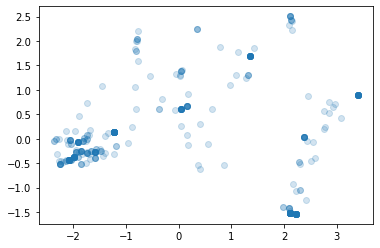

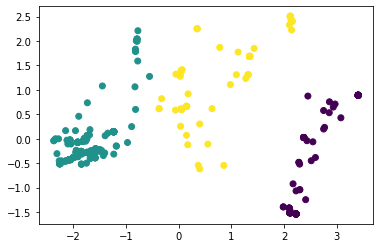

In [0]:
print('2-gram api call with PCA clustering:')
plt.figure()
plt.scatter(PCA_X[:, 0], PCA_X[:, 1], alpha=.2)
plt.figure()
plt.scatter(PCA_X[:, 0], PCA_X[:, 1], c=cluster_labels)

# UPGMA

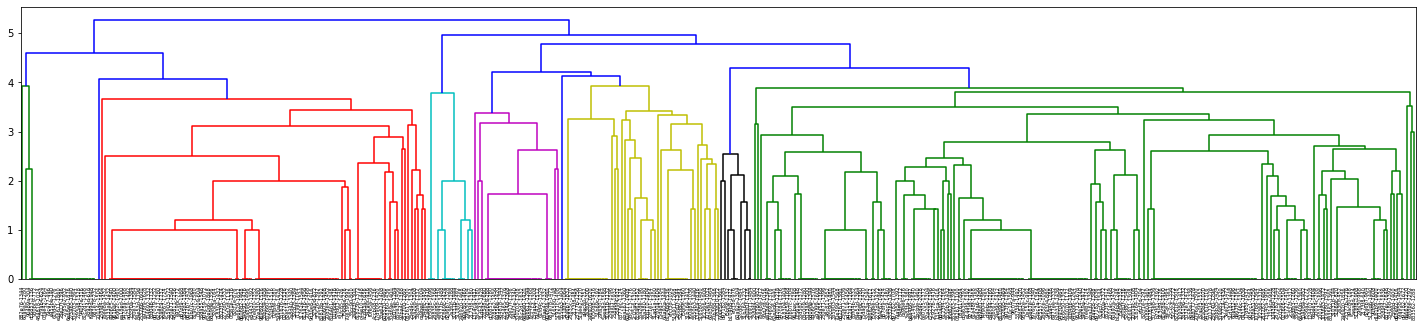

In [0]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(25,5))

X = np.array(onehot_hl_li)
Z = sch.linkage(X, method = 'weighted') # X is a 2d array of observation vectors.
dn = sch.dendrogram(Z, labels = sn_list, orientation = 'top', color_threshold=4)

plt.show()

# Dot Matrix

In [0]:
def createDotMatrix(hl):
  n = len(hl)

  x = hl.li
  y = hl.li

  matched = [[0 for j in range(n)] for i in range(n)]
  for i, t_api_x in enumerate(x):
    for j, t_api_y in enumerate(y):
      if hl.par == True:
        api_x = t_api_x[1] + t_api_x[2]
        api_y = t_api_y[1] + t_api_y[2]
      else:
        api_x = t_api_x[1]
        api_y = t_api_y[1]
      if api_x == api_y:
        matched[j][i] = 1.0

  return matched

In [0]:
hl = hl_list[0]
matched = createDotMatrix(hl)

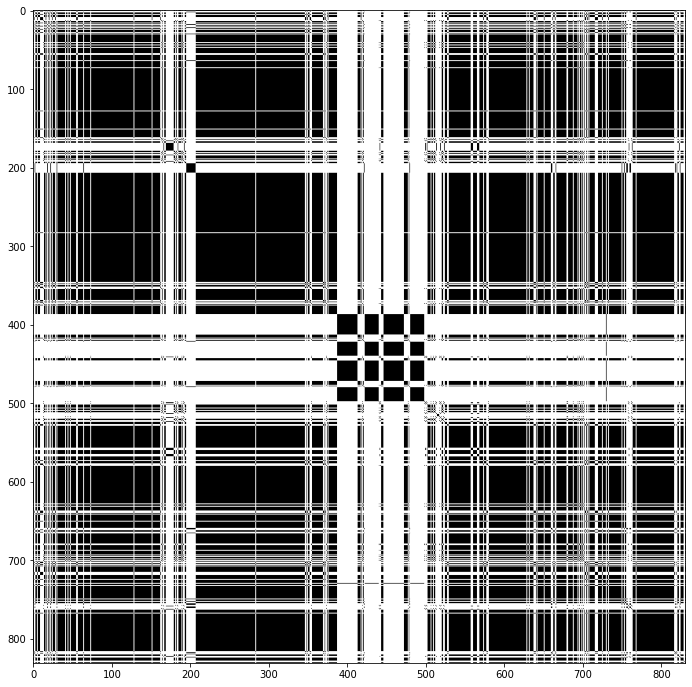

In [0]:
# draw a dot matrix with a hl with itself
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.imshow(matched, cmap='Greys')
plt.show()

### personal note:
actually I can't find a proper way to use dot matrix graph in big data analysis.
it is impossible for me to go through all the hoologs to compair their api-call and analysis repectively. instead, i just use two of the hooklogs to demonstrate how i do analysis for a specific case.

In [0]:
# Two hooklogs

def createPairDotMatrix(h1, h2):
  n = len(h1)
  m = len(h2)

  x = h1.li
  y = h2.li

  matched = [[0 for j in range(n)] for i in range(m)]
  for i, t_api_x in enumerate(x):
    for j, t_api_y in enumerate(y):
      if h1.par ==True and h2.par == True:
        api_x = t_api_x[1] + t_api_x[2]
        api_y = t_api_y[1] + t_api_y[2]
      else:
        api_x = t_api_x[1]
        api_y = t_api_y[1]
      if api_x == api_y:
        matched[j][i] = 1.0

  return matched

In [0]:
!ls hooklogs419/ -al

total 24380
drwxr-xr-x 2 root root  36864 Jun 28  2019 .
drwxr-xr-x 1 root root   4096 Apr 19 07:44 ..
-rw-r--r-- 1 root root 105757 Sep 18  2014 0006dfb19193ff5910b3ffc94a29a7f6_1416.trace.hooklog
-rw-r--r-- 1 root root   8950 Sep 21  2014 0278192ce1aa7f8c4ae746eae73e6475_1484.trace.hooklog
-rw-r--r-- 1 root root 111858 Sep 18  2014 02c27a2e4c215d22fabdfc7b46fd6f20_1536.trace.hooklog
-rw-r--r-- 1 root root 112355 Oct 10  2014 02fbfeafd096088a56f6ffb9_1380.trace.hooklog
-rw-r--r-- 1 root root 213669 Oct  3  2014 03ae42959b733f11a168e268_1264.trace.hooklog
-rw-r--r-- 1 root root  86533 Oct  3  2014 03ae42959b733f11a168e268_1332.trace.hooklog
-rw-r--r-- 1 root root   2118 Sep 18  2014 03c009b451e012002513513a5d7e1b00_1280.trace.hooklog
-rw-r--r-- 1 root root 112475 Sep 18  2014 03c009b451e012002513513a5d7e1b00_604.trace.hooklog
-rw-r--r-- 1 root root   8950 Sep 23  2014 043121379d4a5f0f227d74ef0336428c_1636.trace.hooklog
-rw-r--r-- 1 root root   1413 Sep 17  2014 060c18ffe4b4f8b47c90a233

### if two softwares show almost a symmetric dot matrix, that means they are totally the same, or just a few line had been changed.

class Hooklog: hooklogs419/0006dfb19193ff5910b3ffc94a29a7f6_1416.trace.hooklog, par = True, len = 529, digit name = 0006df-1416
class Hooklog: hooklogs419/2272d05b959f133bcf3e38c48ddbfcad_1532.trace.hooklog, par = True, len = 559, digit name = 2272d0-1532


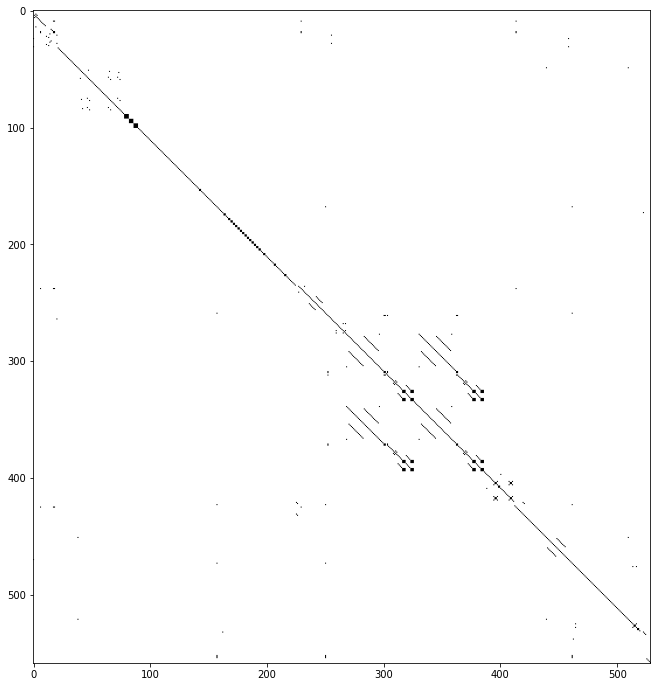

In [0]:
par_h1 = Hooklog('hooklogs419/0006dfb19193ff5910b3ffc94a29a7f6_1416.trace.hooklog', True)
par_h2 = Hooklog('hooklogs419/2272d05b959f133bcf3e38c48ddbfcad_1532.trace.hooklog', True)
print(par_h1)
print(par_h2)

pair_matched = createPairDotMatrix(par_h1, par_h2)

plt.figure(figsize=(12,12))
plt.imshow(pair_matched, cmap='Greys')
plt.show()

### some of them call the same apis and will show like graph below

class Hooklog: hooklogs419/0006dfb19193ff5910b3ffc94a29a7f6_1416.trace.hooklog, par = True, len = 529, digit name = 0006df-1416
class Hooklog: hooklogs419/2272d05b959f133bcf3e38c48ddbfcad_1532.trace.hooklog, par = True, len = 559, digit name = 2272d0-1532


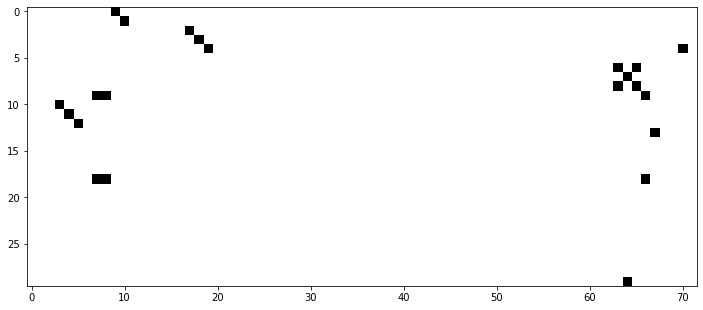

In [0]:
par_h3 = Hooklog('hooklogs419/913cf9179e7dc56363673a926eaf5b7b_1276.trace.hooklog', True)
par_h4 = Hooklog('hooklogs419/90ff8f17742e35022a36473867119d85_1608.trace.hooklog', True)
print(par_h1)
print(par_h2)

pair_matched = createPairDotMatrix(par_h3, par_h4)

plt.figure(figsize=(12,12))
plt.imshow(pair_matched, cmap='Greys')
plt.show()